# Customer Credit Score Prediction Model without Outlier Exclusion

## Context 

In the current banking scenario, the use of data science and machine learning techniques has become essential to increase the accuracy and agility in credit risk assessment. The correct prediction of customer credit scores allows financial institutions to make safer and more personalized decisions in processes such as loan granting, credit card limits, and financing.

This project proposes the construction of a supervised Machine Learning pipeline without outlier exclusion aimed at predicting customer credit scores based on registration, financial, and behavioral variables, and future comparison of results with the same pipeline but with excluded outliers to consider its robustness in model performance.

The model will classify the score as: Poor, Standard, Good.

## Project Objectives
- Build a preprocessing, modeling, and evaluation pipeline to predict credit scores.
- Test different classification models, comparing their performance.
- Identify the main attributes that influence customer credit scores.
- Obtain useful interpretations that help the credit area improve its analysis policies.
- Develop my knowledge in the Data Science field.

## Description of Data Used
The data used in this project contains registration and financial information from banking institution customers, organized based on variables that historically influence credit scores.

The main variables include:

- `idade` – Customer's age  
- `salario_anual` – Declared annual income  
- `mix_credito` – Variety of credit account types an individual holds  
- `divida_total` – Total outstanding debt  
- `num_pagamentos_atrados` – Number of recent late payments  
- `idade_historico_credito` – Length of credit history (how long credit accounts like loans or credit cards have been open)  
- `juros_emprestimo` – Interest rate on the credit line  
- `dias_atraso` – Number of days past due  
- `score_credito` – Target variable: Credit score category (Poor, Standard, Good)

## Initial Expectations

- Variables such as income, payment history, and debt level are expected to have a strong impact on credit score.

- Tree-based models, such as Random Forest, should show good performance and greater interpretability.

- Detailed analysis of the confusion matrix and classification report will allow evaluation of not only overall accuracy but also what types of errors the model is making (false positives or negatives).

In [1]:
import pandas as pd

tabela = pd.read_csv("clientes.csv")

display(tabela)

display(tabela.info())

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

In [2]:
print(tabela.columns)

Index(['id_cliente', 'mes', 'idade', 'profissao', 'salario_anual',
       'num_contas', 'num_cartoes', 'juros_emprestimo', 'num_emprestimos',
       'dias_atraso', 'num_pagamentos_atrasados', 'num_verificacoes_credito',
       'mix_credito', 'divida_total', 'taxa_uso_credito',
       'idade_historico_credito', 'investimento_mensal',
       'comportamento_pagamento', 'saldo_final_mes', 'score_credito',
       'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal',
       'emprestimo_credito', 'emprestimo_estudantil'],
      dtype='object')


'id_cliente'SAI, 'mes', 'idade', 'profissao', 'salario_anual',
       'num_contas', 'num_cartoes', 'juros_emprestimo', 'num_emprestimos',
       'dias_atraso', 'num_pagamentos_atrasados', 'num_verificacoes_credito',
       'mix_credito', 'divida_total', 'taxa_uso_credito',
       'idade_historico_credito', 'investimento_mensal',
       'comportamento_pagamento', 'saldo_final_mes', 'score_credito',
       'emprestimo_carro', 'emprestimo_casa', 'emprestimo_pessoal',
       'emprestimo_credito', 'emprestimo_estudantil

In [3]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder transforma as categorias em numeros

codificador_profissao = LabelEncoder()
tabela["profissao"] = codificador_profissao.fit_transform(tabela["profissao"])


# mix_credito
codificador_credito = LabelEncoder()
tabela["mix_credito"] = codificador_credito.fit_transform(tabela["mix_credito"])

# comportamento_pagamento
codificador_pagamento = LabelEncoder()
tabela["comportamento_pagamento"] = codificador_pagamento.fit_transform(tabela["comportamento_pagamento"])


display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

None

In [4]:
tabela = tabela.drop('id_cliente', axis=1) # remove a coluna 'id' do dataframe, pois ela nao e necessaria para a IA
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   mes                       100000 non-null  int64  
 1   idade                     100000 non-null  float64
 2   profissao                 100000 non-null  int64  
 3   salario_anual             100000 non-null  float64
 4   num_contas                100000 non-null  float64
 5   num_cartoes               100000 non-null  float64
 6   juros_emprestimo          100000 non-null  float64
 7   num_emprestimos           100000 non-null  float64
 8   dias_atraso               100000 non-null  float64
 9   num_pagamentos_atrasados  100000 non-null  float64
 10  num_verificacoes_credito  100000 non-null  float64
 11  mix_credito               100000 non-null  int64  
 12  divida_total              100000 non-null  float64
 13  taxa_uso_credito          100000 non-null  fl

In [5]:
x = tabela.drop('score_credito', axis=1)  # remove a coluna 'score_credito' do dataframe para usar como variaveis independentes
y = tabela['score_credito']

In [6]:
from sklearn.model_selection import train_test_split
# Dividir a base de dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=27)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rfc_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
#lr_model = LogisticRegression()

rfc_model.fit(x_treino, y_treino)
knn_model.fit(x_treino, y_treino)
#lr_model.fit(x_treino, y_treino)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score

y_rfc_pred = rfc_model.predict(x_teste)
y_knn_pred = knn_model.predict(x_teste)

print("Acuracia do modelo Random Forest: ", accuracy_score(y_teste, y_rfc_pred))
print("Acuracia do modelo KNN: ", accuracy_score(y_teste, y_knn_pred))

c:\Users\igor_\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\igor_\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\igor_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\igor_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039

Acuracia do modelo Random Forest:  0.8317
Acuracia do modelo KNN:  0.7509


### Best Model - Random Forest Classifier

According to the metric used for model evaluation:

- Random Forest: 83.32% accuracy
- KNN Model: 75.09% accuracy

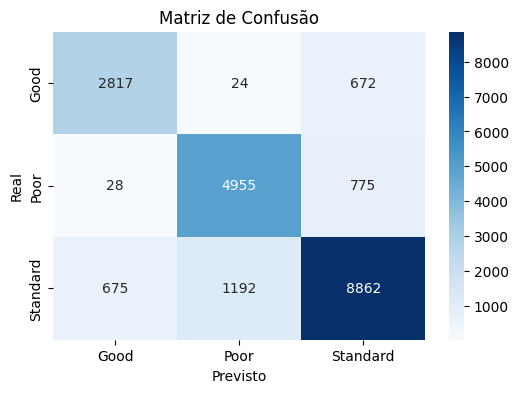

Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.80      0.80      0.80      3513
        Poor       0.80      0.86      0.83      5758
    Standard       0.86      0.83      0.84     10729

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Good', 'Poor', 'Standard']
# Matriz de confusão
cm = confusion_matrix(y_teste, y_rfc_pred)

# Plot da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de classificação
report = classification_report(y_teste, y_rfc_pred)
print("Relatório de Classificação:")
print(report)


### Class-by-Class Analysis
<b>Good Class</b> (lowest score)
- Correct predictions (TP): 2,817
- Errors as Standard: 672
- Errors as Poor: 24

<b>Conclusion</b>: the model frequently confuses the Good class with the Standard class, which can be critical.

<b>Poor Class</b> (intermediate score)
- Correct predictions (TP): 4,955
- Errors as Good: 28
- Errors as Standard: 775

<b>Conclusion</b>: performance here is reasonable, but there is still a considerable number of Poor class examples being classified as Standard.

<b>Standard Class</b> (highest score)
- Correct predictions (TP): 8,862
- Errors as Good: 675
- Errors as Poor: 1,192

<b>Conclusion</b>: most Standard class examples are being correctly identified, but there are notable errors — especially 1,192 being confused with Poor class.

### Importance of each feature for the model

Text(0.5, 1.0, 'Importância de cada coluna no modelo Random Forest Classifier')

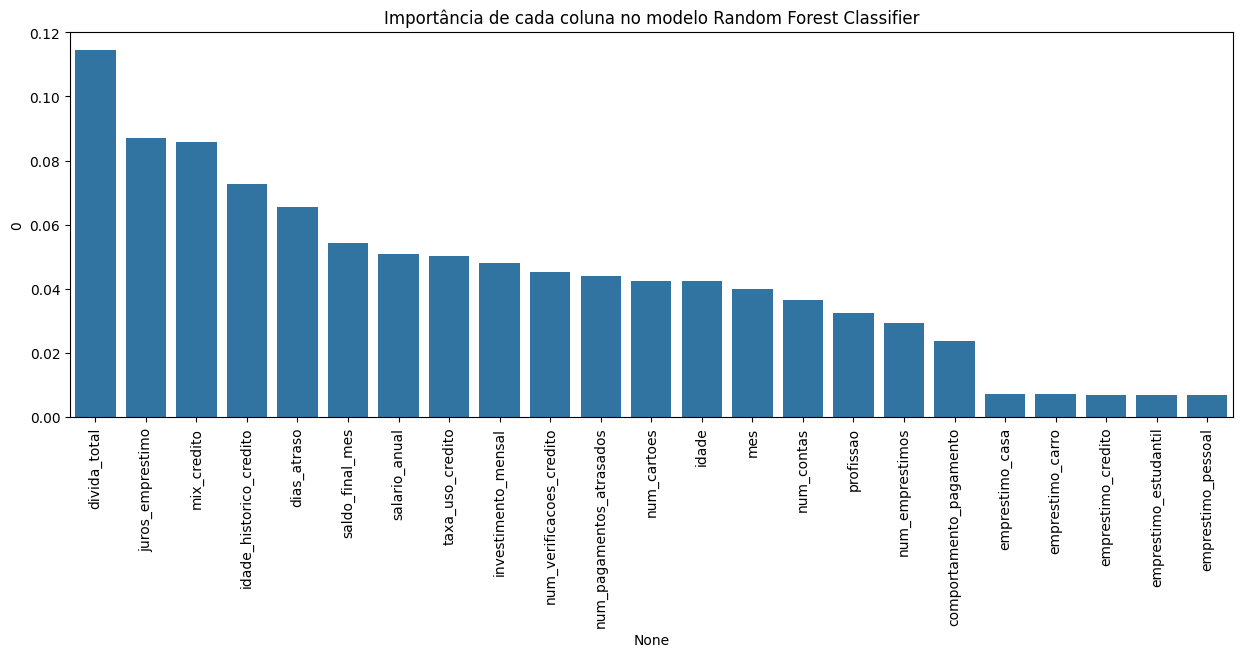

In [ ]:
df_importancia_cada_coluna = pd.DataFrame(rfc_model.feature_importances_, index=x_treino.columns)
# Creates a DataFrame with the feature importances from the Extra Trees Regressor model, which was evaluated as the best.
df_importancia_cada_coluna = df_importancia_cada_coluna.sort_values(by=0, ascending=False)  
plt.figure(figsize=(15, 5))
barras_features_importances = sns.barplot(x=df_importancia_cada_coluna.index, y=df_importancia_cada_coluna[0])
barras_features_importances.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for better readability.
plt.title('Importância de cada coluna no modelo Random Forest Classifier')

## Final Considerations

- As expected, the debt level variable (total_debt) has a strong influence on credit score prediction. The credit_mix variable, which refers to the variety of credit account types an individual has, the loan_interest variable - rate charged on the taken loan, the credit_history_age variable - How long credit accounts have been open, i.e., how long accounts like credit cards, loans, and financing have been maintained, and late_payments_num – Number of recent late occurrences form the top 5 features that had the greatest impact on credit score prediction.

- As expected, Random Forest Classifier showed good performance.

- The model is intended to be applied with outlier exclusion to consider its robustness against them (project: 'prev_score_cliente.ipynb').

### Making predictions with new dataset:

In [10]:
novos_clientes = pd.read_csv("novos_clientes.csv")

codificador_profissao = LabelEncoder()
novos_clientes["profissao"] = codificador_profissao.fit_transform(novos_clientes["profissao"])


# mix_credito
codificador_credito = LabelEncoder()
novos_clientes["mix_credito"] = codificador_credito.fit_transform(novos_clientes["mix_credito"])

# comportamento_pagamento
codificador_pagamento = LabelEncoder()
novos_clientes["comportamento_pagamento"] = codificador_pagamento.fit_transform(novos_clientes["comportamento_pagamento"])


nova_previsao_rfc = rfc_model.predict(novos_clientes)
print(f"Previsao Random Forest: {nova_previsao_rfc}")

Previsao Random Forest: ['Poor' 'Good' 'Standard']
